In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from collections import Counter

## Combining the two datasets 

Load 'Good Examples':

In [2]:
df_good = pd.read_csv('good_samples_cleaned.csv')

df_good.head(2)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message
0,Application,2023-09-22,00:10:15,CLIENT-PC,Microsoft-Windows-Security-SPP,NaN,4,Classic,NaN,16384,4,3267,Successfully scheduled Software Protection ser...
1,System,2023-09-22,00:10:01,CLIENT-PC,Microsoft-Windows-Kernel-General,NaN,4,NaN,Info,16,4,2279,The access history in hive \??\C:\Users\Commun...


Let's add a feature called 'Malicious' with the value 'No':

In [3]:
isMalicious = ['No'] * len(df_good)
df_good['isMalicious'] = isMalicious

df_good.head(2)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message,isMalicious
0,Application,2023-09-22,00:10:15,CLIENT-PC,Microsoft-Windows-Security-SPP,NaN,4,Classic,NaN,16384,4,3267,Successfully scheduled Software Protection ser...,No
1,System,2023-09-22,00:10:01,CLIENT-PC,Microsoft-Windows-Kernel-General,NaN,4,NaN,Info,16,4,2279,The access history in hive \??\C:\Users\Commun...,No


Load 'Bad Examples':

In [4]:
df_bad = pd.read_csv('bad_samples_cleaned.csv')

df_bad.head(2)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message
0,Security,2023-08-26,17:20:24,CLIENT-PC,Microsoft Windows security auditing.,Process Creation,0,Audit Success,Info,4688,0,182305,A new process has been created.
1,Security,2023-08-26,17:20:24,CLIENT-PC,Microsoft Windows security auditing.,Filtering Platform Packet Drop,0,Audit Failure,Info,5152,0,182306,The Windows Filtering Platform has blocked a p...


Let's add a feature called 'Malicious' with the value 'No':

In [5]:
isMalicious = ['Yes'] * len(df_bad)
df_bad['isMalicious'] = isMalicious

df_bad.head(2)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message,isMalicious
0,Security,2023-08-26,17:20:24,CLIENT-PC,Microsoft Windows security auditing.,Process Creation,0,Audit Success,Info,4688,0,182305,A new process has been created.,Yes
1,Security,2023-08-26,17:20:24,CLIENT-PC,Microsoft Windows security auditing.,Filtering Platform Packet Drop,0,Audit Failure,Info,5152,0,182306,The Windows Filtering Platform has blocked a p...,Yes


#### Now let's merge the two dataeset together:

In [6]:
df_merged = pd.concat([df_good, df_bad], ignore_index=True, sort=False)
df_merged.head(3)

,LogName,Date,Time,ComputerName,SourceName,TaskCategory,EventType,Keywords,OpCode,EventCode,Type,RecordNumber,Message,isMalicious
0,Application,2023-09-22,00:10:15,CLIENT-PC,Microsoft-Windows-Security-SPP,NaN,4,Classic,NaN,16384,4,3267,Successfully scheduled Software Protection ser...,No
1,System,2023-09-22,00:10:01,CLIENT-PC,Microsoft-Windows-Kernel-General,NaN,4,NaN,Info,16,4,2279,The access history in hive \??\C:\Users\Commun...,No
2,Application,2023-09-22,00:09:45,CLIENT-PC,SecurityCenter,NaN,4,Classic,Info,15,4,3266,Updated Windows Defender status successfully t...,No


In [7]:
print('df_good shape:', df_good.shape)
print('df_bad shape:', df_bad.shape)
print('df_merged shape:', df_merged.shape)

df_good shape: (351, 14)
df_bad shape: (3740, 14)
df_merged shape: (4091, 14)


Let's see what event codes we have:

<Axes: xlabel='EventCode'>

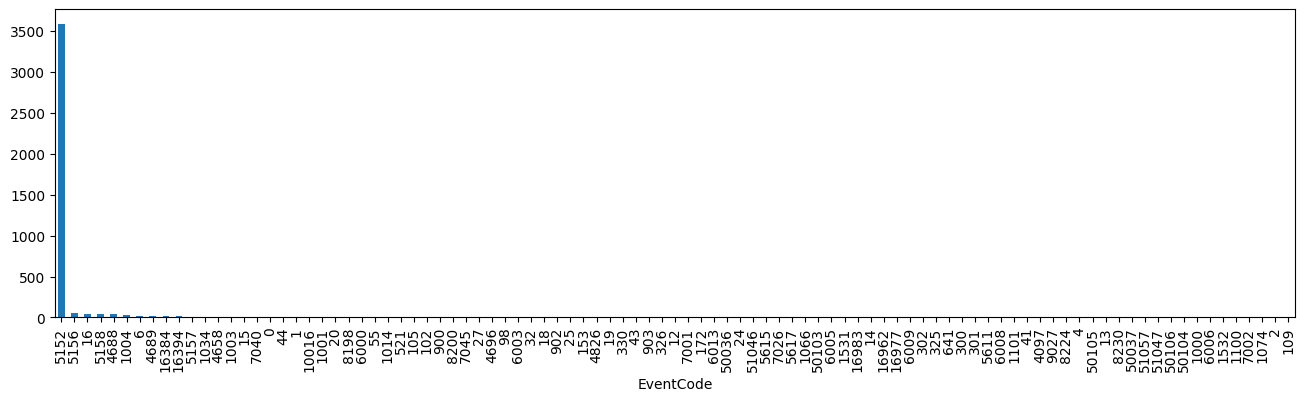

In [8]:
plt.figure(figsize=(16,4))
df_merged['EventCode'].value_counts().plot.bar()

Let's save our new dataset as <b>'labeled_dataset.csv'</b>:

In [9]:
df_merged.to_csv('labeled_dataset.csv', index=False)